In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from pathlib import Path

In [3]:
# Load the dataset
file_path = Path("./data/stroke_data.csv")
df = pd.read_csv(file_path)

# Display the first few rows of the data
df


,Unnamed: 0,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.9,never smoked,0
5106,5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
data_frame = df.drop('Unnamed: 0', axis=1)
data_frame.head()

,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
# Drop the 'Stroke' column for the features and labels
X = data_frame.drop('Stroke', axis=1)
y = data_frame['Stroke']


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Define the columns to be encoded and scaled
categorical_cols = ['Gender', 'Ever Married', 'Work Type', 'Residence Type', 'Smoking Status']
numerical_cols = ['Age', 'Average Glucose Level', 'BMI']


In [8]:
# Create transformers for encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [9]:
# Create a pipeline without SMOTE
pipeline_without_smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline_without_smote

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Average Glucose Level',
                                                   'BMI']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Ever Married',
                                                   'Work Type',
                                                   'Residence Type',
                                                   'Smoking Status'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [10]:
# Fit the pipeline without SMOTE
pipeline_without_smote.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Average Glucose Level',
                                                   'BMI']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Ever Married',
                                                   'Work Type',
                                                   'Residence Type',
                                                   'Smoking Status'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [11]:
# Make predictions on the test set
y_pred_without_smote = pipeline_without_smote.predict(X_test)


In [12]:
# Evaluate the model without SMOTE
accuracy_without_smote = accuracy_score(y_test, y_pred_without_smote)
print(f"Accuracy without SMOTE: {accuracy_without_smote:.2f}")

# Display classification report without SMOTE
print("Classification Report without SMOTE:\n", classification_report(y_test, y_pred_without_smote))


Accuracy without SMOTE: 0.94
Classification Report without SMOTE:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.50      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.72      0.51      0.50      1022
weighted avg       0.91      0.94      0.91      1022



In [13]:
# Separate numerical and categorical columns
numerical_cols = ['Age', 'Average Glucose Level', 'BMI']
categorical_cols = ['Gender', 'Ever Married', 'Work Type', 'Residence Type', 'Smoking Status']


In [14]:
# Extract numerical features
X_train_numerical = X_train[numerical_cols]
X_test_numerical = X_test[numerical_cols]

In [15]:
# Apply SMOTE only to numerical features
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_numerical, y_train)


In [16]:
# Combine resampled numerical features with categorical features
X_train_resampled = pd.concat([X_train_resampled, X_train[categorical_cols]], axis=1)


In [17]:
# Update the transformer for encoding in the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


In [18]:
# Create a pipeline with SMOTE
pipeline_with_smote = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [19]:
# Fit the pipeline with SMOTE
pipeline_with_smote.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_with_smote = pipeline_with_smote.predict(X_test)


In [20]:
# Evaluate the model with SMOTE
accuracy_with_smote = accuracy_score(y_test, y_pred_with_smote)
print(f"Accuracy with SMOTE: {accuracy_with_smote:.2f}")

# Display classification report with SMOTE
print("Classification Report with SMOTE:\n", classification_report(y_test, y_pred_with_smote))


Accuracy with SMOTE: 0.89
Classification Report with SMOTE:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       960
           1       0.24      0.37      0.29        62

    accuracy                           0.89      1022
   macro avg       0.60      0.65      0.62      1022
weighted avg       0.91      0.89      0.90      1022



In [21]:
sorted_variables = sorted(zip(pipeline_with_smote.steps[1][1].feature_importances_, X.columns), reverse=True)

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

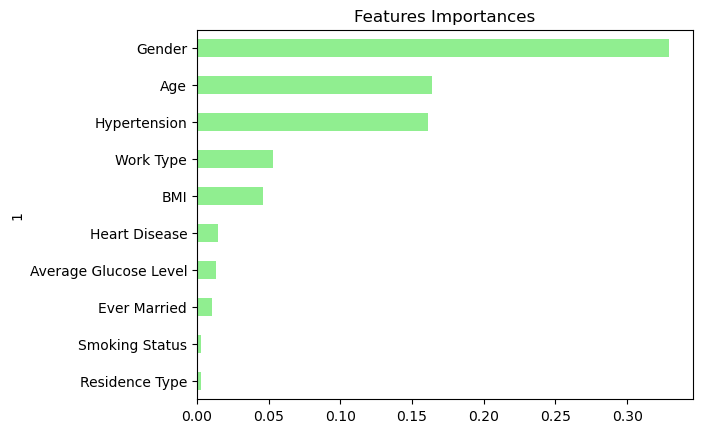

In [22]:
importances_df = pd.DataFrame(sorted_variables)
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [20]:
import pickle

filename = 'Randomforest.sav'
with open(filename, 'wb') as model_file:
    pickle.dump(pipeline_without_smote, model_file)